# 김가네 팀플 (4) 데이터 분석 (워드클라우드)_ 230622
- 팀원 별로 분담해서 분석 진행

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('mode.chained_assignment',  None)

In [8]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('CS.csv', encoding='euc-kr')
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       20624 non-null  int64
 1   where_cnt      20624 non-null  int64
 2   attend_cnt     20624 non-null  int64
 3   volunteer_cnt  20624 non-null  int64
 4   history_cnt    20624 non-null  int64
 5   festival_cnt   20624 non-null  int64
 6   standard       20624 non-null  int64
 7   block          20624 non-null  int64
 8   expense        20624 non-null  int64
 9   expense_f      20624 non-null  int64
 10  difficulty     20624 non-null  int64
 11  intention      20624 non-null  int64
 12  history        20624 non-null  int64
 13  history_f      20624 non-null  int64
 14  festival       20624 non-null  int64
 15  festival_f     20624 non-null  int64
 16  sex            20624 non-null  int64
 17  age            20624 non-null  int64
 18  education      20624 non-null  int64
 19  marr

## 워드 클라우드 진행

In [9]:
# 워드클라우드 만들 때 필요한 wordcloud 패키지 설치하기 
# !pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [10]:
# 워드클라우드를 원하는 형태의 이미지를 이용해 처리하기 위해
# 파이썬 이미지 처리 패키지인 pillow(PIL) 패키지 설치
# PIL = Python Imaging Library

# !pip install pillow


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
# 위에서 설치한 라이브러리 import 
from wordcloud import WordCloud
from PIL import *

### 워드클라우드 예제 적용 가능한지 확인

In [15]:
# 워드클라우드 모양 잡기
cand_mask = np.array(Image.open('circle_image.jpg'))

cand_mask

array([[[255, 255, 255, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        ...,
        [254, 254, 254, 255],
        [254, 254, 254, 255],
        [254, 254, 254, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [16]:
# 워드클라우드에 출력할 딕셔너리 생성
words = {
    '돔돔이블로그':1965,
    'domdom':1666,
    '티스토리':955,
    '돔돔':855,
    '워드':841,
    '클라우드':612,
    '파이썬':598,
    'tistory':576,
    '코딩':542,
    '장인':487,
    '블로그':412,
    '방문자':401,
    '댓글':397,
    '롤':391,
    '칼바람':308,
    '나락':284,
    '환영':255,
    '자바':231,
    '장고':175,
    '자바스크립트':152,
    '스프링':109,
    '부트':71,
    '스타벅스':68,
    '제주말차':59,
    '프라푸치노':21,
    '먹고싶다':19,
    '디저트':6,
    '꿀잼':2
}

In [21]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색은 빨간색으로
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(words)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

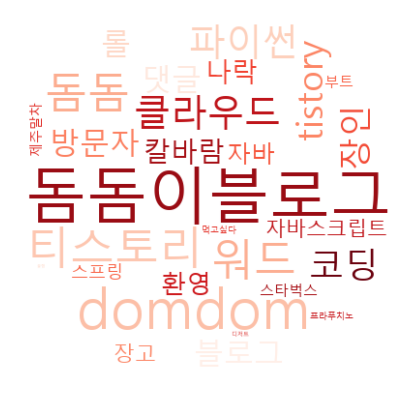

In [22]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

In [ ]:
# 워드클라우드 이미지 저장
# plt.savefig('test.png')

## 국민문화예술활동조사 데이터로 워드클라우드 생성

### 워드클라우드 시각화가 필요한 feature

- standard : 기준
- block : 걸림돌
- difficulty : 어려움
- expense : 가장 많이 지출한 1순위 (후순위 작업)
- expense_f : 향후 지출 의향 1순위 (후순위 작업)



### block 과 difficulty 기준 분리
- block : 문화행사 '직접 관람' 시 어려움
- difficulty : 문화행사 '참여' 시 어려움

### 각 feature 별 범주 코드 기준 확인

In [36]:
standard_words = {
    1:'컨텐츠 및 퀄리티',
    2:'비용',
    3:'작가 및 출연진',
    4:'개최 장소의 유명도',
    5:'교통',
    6:'편의시설여부',
    7:'전문가 의견 및 언론보도',
    8:'주위 의견 및 네티즌 의견',
    9:'접근성',
    10:'기타',
}

In [37]:
block_words = {
    1:'비용',
    2:'시간',
    3:'관심도',
    4:'교통',
    5:'편의시설미비',
    6:'관련정보부족',
    7:'친구없음',
    8:'시설부족',
    9:'기타',
}

In [38]:
difficulty_words = {
    1:'비용',
    2:'시간',
    3:'관심도',
    4:'교통',
    5:'편의시설미비',
    6:'관련정보부족',
    7:'친구없음',
    8:'시설부족',
    9:'기타',
}

In [130]:
expense_words = {
    1:'문학',
    2:'미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'전시회',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

### 기존의 숫자 코드 -> 문자 기준으로 변경

In [139]:
# 워드클라우드 생성을 위한 데이터프레임 할당
CS_wordcloud = CS[['standard', 'block', 'difficulty', 'expense', 'expense_f']]
CS_wordcloud

,standard,block,difficulty,expense,expense_f
0,1,1,3,14,14
1,2,6,1,14,9
2,2,1,1,8,15
3,1,2,4,14,14
4,2,1,4,14,14
...,...,...,...,...,...
20619,4,3,6,12,12
20620,1,2,2,12,12
20621,1,2,2,17,12
20622,1,2,2,12,12


In [140]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'standard',
    'block',
    'difficulty',
    'expense',
    'expense_f'
]

In [141]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_wordcloud[column].value_counts(ascending=False)

standard
1     6542
2     5412
9     2233
5     2167
3     2036
4      866
7      470
6      441
8      428
10      29
Name: count, dtype: int64

block
2    5738
1    5401
3    3468
6    2087
8    1476
4    1277
5     568
7     527
9      82
Name: count, dtype: int64

difficulty
2    6209
3    4408
1    3511
6    2977
8    1189
4    1030
5     623
7     600
9      77
Name: count, dtype: int64

expense
14    5771
17    5233
12    4786
5     1081
15     747
1      706
8      560
7      511
11     248
9      238
13     201
16     189
2       89
10      87
6       67
4       65
3       45
Name: count, dtype: int64

expense_f
12    5837
14    4724
15    2161
17    1801
1      876
5      780
9      745
11     740
13     687
8      570
16     459
7      440
10     297
6      166
4      135
2      129
3       77
Name: count, dtype: int64

In [142]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [standard_words, block_words, difficulty_words, expense_words, expense_words]

In [143]:
# 코드 변경 함수 선언
def get_list_setting_column(column, setting_prev_next):
    setting_done_list = []
    
    for code_value in column:
        setting_done_list.append(setting_prev_next[code_value])
    
    return setting_done_list

In [144]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_wordcloud[column] = get_list_setting_column(CS_wordcloud[column], setting_codes[i])

In [145]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_wordcloud[column].value_counts(ascending=False)

standard
컨텐츠 및 퀄리티         6542
비용                5412
접근성               2233
교통                2167
작가 및 출연진          2036
개최 장소의 유명도         866
전문가 의견 및 언론보도      470
편의시설여부             441
주위 의견 및 네티즌 의견     428
기타                  29
Name: count, dtype: int64

block
시간        5738
비용        5401
관심도       3468
관련정보부족    2087
시설부족      1476
교통        1277
편의시설미비     568
친구없음       527
기타          82
Name: count, dtype: int64

difficulty
시간        6209
관심도       4408
비용        3511
관련정보부족    2977
시설부족      1189
교통        1030
편의시설미비     623
친구없음       600
기타          77
Name: count, dtype: int64

expense
영화        6282
연극/뮤지컬    5867
해당사항없음    5233
대중음악      1307
문학         706
전통예술       313
무용         268
전시회        238
기타         189
서양음악       132
미술          89
Name: count, dtype: int64

expense_f
연극/뮤지컬    6617
영화        5164
대중음악      2731
해당사항없음    1801
문학         876
전통예술       875
무용         853
전시회        745
기타         459
서양음악       374
미술         129
Name: count, dtype: int64

## 숫자 코드 --> 문자 기준으로 바꾼 결과
- 바뀐 데이터프레임 확인
- 각 열에 해당하는 시리즈를 딕셔너리로 변환

In [146]:
CS_wordcloud

,standard,block,difficulty,expense,expense_f
0,컨텐츠 및 퀄리티,비용,관심도,영화,영화
1,비용,관련정보부족,비용,영화,전시회
2,비용,비용,비용,대중음악,대중음악
3,컨텐츠 및 퀄리티,시간,교통,영화,영화
4,비용,비용,교통,영화,영화
...,...,...,...,...,...
20619,개최 장소의 유명도,관심도,관련정보부족,연극/뮤지컬,연극/뮤지컬
20620,컨텐츠 및 퀄리티,시간,시간,연극/뮤지컬,연극/뮤지컬
20621,컨텐츠 및 퀄리티,시간,시간,해당사항없음,연극/뮤지컬
20622,컨텐츠 및 퀄리티,시간,시간,연극/뮤지컬,연극/뮤지컬


In [148]:
# {'기준' : 개수} 로 딕셔너리 생성

standard_dict = CS_wordcloud['standard'].value_counts(ascending=False).to_dict()
block_dict = CS_wordcloud['block'].value_counts(ascending=False).to_dict()
difficulty_dict = CS_wordcloud['difficulty'].value_counts(ascending=False).to_dict()
expense_dict = CS_wordcloud['expense'].value_counts(ascending=False).to_dict()
expense_f_dict = CS_wordcloud['expense_f'].value_counts(ascending=False).to_dict()

standard_dict
block_dict
difficulty_dict
expense_dict
expense_f_dict

{'컨텐츠 및 퀄리티': 6542,
 '비용': 5412,
 '접근성': 2233,
 '교통': 2167,
 '작가 및 출연진': 2036,
 '개최 장소의 유명도': 866,
 '전문가 의견 및 언론보도': 470,
 '편의시설여부': 441,
 '주위 의견 및 네티즌 의견': 428,
 '기타': 29}

{'시간': 5738,
 '비용': 5401,
 '관심도': 3468,
 '관련정보부족': 2087,
 '시설부족': 1476,
 '교통': 1277,
 '편의시설미비': 568,
 '친구없음': 527,
 '기타': 82}

{'시간': 6209,
 '관심도': 4408,
 '비용': 3511,
 '관련정보부족': 2977,
 '시설부족': 1189,
 '교통': 1030,
 '편의시설미비': 623,
 '친구없음': 600,
 '기타': 77}

{'영화': 6282,
 '연극/뮤지컬': 5867,
 '해당사항없음': 5233,
 '대중음악': 1307,
 '문학': 706,
 '전통예술': 313,
 '무용': 268,
 '전시회': 238,
 '기타': 189,
 '서양음악': 132,
 '미술': 89}

{'연극/뮤지컬': 6617,
 '영화': 5164,
 '대중음악': 2731,
 '해당사항없음': 1801,
 '문학': 876,
 '전통예술': 875,
 '무용': 853,
 '전시회': 745,
 '기타': 459,
 '서양음악': 374,
 '미술': 129}

## 최종 워드클라우드 생성

In [123]:
# standard_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='ocean', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(standard_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

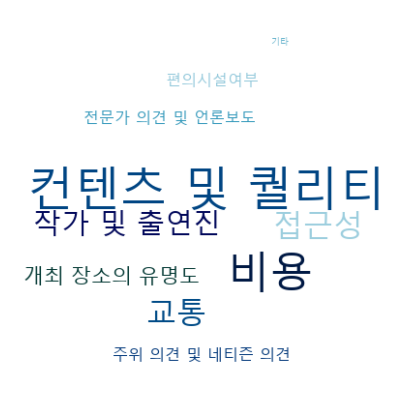

In [124]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [167]:
# block_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(block_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

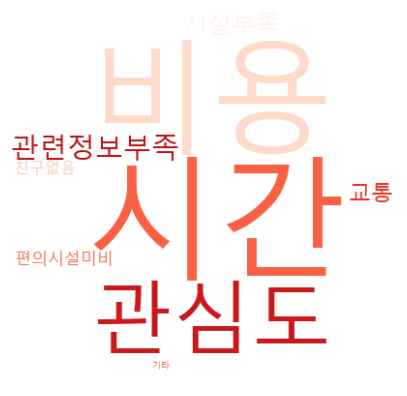

In [168]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [127]:
# difficulty_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(difficulty_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

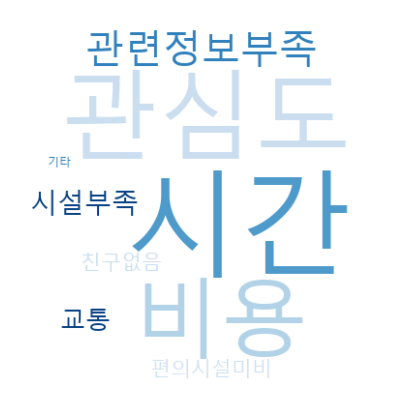

In [128]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [169]:
# 딕셔너리에 '해당사항없음' value 제거
del expense_dict['해당사항없음']

In [170]:
# expense_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

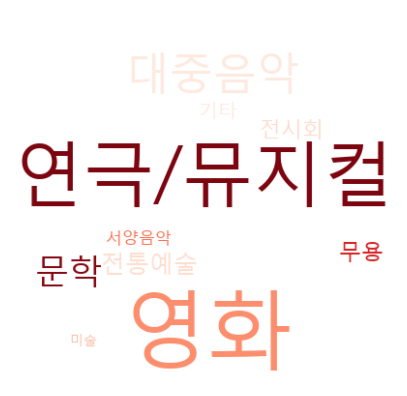

In [171]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

In [172]:
# 딕셔너리에 '해당사항없음' value 제거
del expense_f_dict['해당사항없음']

In [173]:
# expense_f_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_f_dict)

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

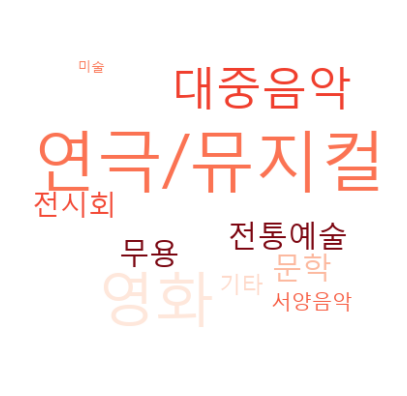

In [174]:
# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

## 연령대별 (시니어) 필터링 후 워드클라우드 진행

In [180]:
# 연령대별 필터링 데이터프레임
CS_senior = CS.copy()
CS_senior = CS_senior[(CS_senior.age == 5) | (CS_senior.age ==6)]

CS_senior

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
6,22,15,0,0,0,0,2,2,14,14,...,2,5,2,5,4,3,1,5,1,1
7,10,0,0,0,2,2,2,4,17,11,...,1,6,1,5,4,2,1,6,1,1
9,7,0,0,0,0,0,3,2,15,12,...,2,5,2,5,3,2,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20611,10,1,0,0,0,0,1,2,1,12,...,2,5,1,5,3,3,1,4,4,3
20613,45,0,0,0,3,0,9,3,17,15,...,2,4,2,6,2,2,5,6,3,1
20616,35,7,0,0,1,0,1,2,1,12,...,2,6,1,5,4,2,3,6,4,1
20618,7,2,0,0,4,0,1,2,16,16,...,2,5,2,5,3,2,3,6,1,1


In [181]:
# 5가지 열만 사용
CS_senior = CS_senior[['standard', 'block', 'difficulty', 'expense', 'expense_f']]
CS_senior

,standard,block,difficulty,expense,expense_f
0,1,1,3,14,14
1,2,6,1,14,9
6,2,2,5,14,14
7,2,4,2,17,11
9,3,2,2,15,12
...,...,...,...,...,...
20611,1,2,2,1,12
20613,9,3,1,17,15
20616,1,2,2,1,12
20618,1,2,2,16,16


In [182]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_senior[column].value_counts(ascending=False)

standard
1     1977
2     1866
9      845
5      747
3      637
4      264
7      159
6      118
8      102
10      12
Name: count, dtype: int64

block
2    2010
1    1597
3    1161
6     755
8     467
4     400
7     205
5     118
9      14
Name: count, dtype: int64

difficulty
2    2106
3    1447
1    1062
6     994
8     382
4     309
7     216
5     186
9      25
Name: count, dtype: int64

expense
17    2340
14    1575
12    1226
5      306
15     276
8      222
1      170
7      170
11     121
9       86
16      73
13      39
10      31
2       30
3       25
4       22
6       15
Name: count, dtype: int64

expense_f
12    1770
14    1517
15     800
17     714
11     291
9      242
1      237
5      230
8      192
16     180
13     157
7      147
10      87
6       51
4       44
2       37
3       31
Name: count, dtype: int64

In [183]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [standard_words, block_words, difficulty_words, expense_words, expense_words]

In [185]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_senior[column] = get_list_setting_column(CS_senior[column], setting_codes[i])

In [187]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_senior[column].value_counts(ascending=False)

standard
컨텐츠 및 퀄리티         1977
비용                1866
접근성                845
교통                 747
작가 및 출연진           637
개최 장소의 유명도         264
전문가 의견 및 언론보도      159
편의시설여부             118
주위 의견 및 네티즌 의견     102
기타                  12
Name: count, dtype: int64

block
시간        2010
비용        1597
관심도       1161
관련정보부족     755
시설부족       467
교통         400
친구없음       205
편의시설미비     118
기타          14
Name: count, dtype: int64

difficulty
시간        2106
관심도       1447
비용        1062
관련정보부족     994
시설부족       382
교통         309
친구없음       216
편의시설미비     186
기타          25
Name: count, dtype: int64

expense
해당사항없음    2340
영화        1745
연극/뮤지컬    1532
대중음악       498
문학         170
전통예술       143
전시회         86
기타          73
서양음악        56
무용          54
미술          30
Name: count, dtype: int64

expense_f
연극/뮤지컬    2000
영화        1664
대중음악       992
해당사항없음     714
전통예술       335
전시회        242
문학         237
무용         208
기타         180
서양음악       118
미술          37
Name: count, dtype: int64

In [189]:
# 문자로 바꿔준 데이터프레임 확인
CS_senior

,standard,block,difficulty,expense,expense_f
0,컨텐츠 및 퀄리티,비용,관심도,영화,영화
1,비용,관련정보부족,비용,영화,전시회
6,비용,시간,편의시설미비,영화,영화
7,비용,교통,시간,해당사항없음,전통예술
9,작가 및 출연진,시간,시간,대중음악,연극/뮤지컬
...,...,...,...,...,...
20611,컨텐츠 및 퀄리티,시간,시간,문학,연극/뮤지컬
20613,접근성,관심도,비용,해당사항없음,대중음악
20616,컨텐츠 및 퀄리티,시간,시간,문학,연극/뮤지컬
20618,컨텐츠 및 퀄리티,시간,시간,기타,기타


In [188]:
# {'기준' : 개수} 로 딕셔너리 생성

standard_dict = CS_senior['standard'].value_counts(ascending=False).to_dict()
block_dict = CS_senior['block'].value_counts(ascending=False).to_dict()
difficulty_dict = CS_senior['difficulty'].value_counts(ascending=False).to_dict()
expense_dict = CS_senior['expense'].value_counts(ascending=False).to_dict()
expense_f_dict = CS_senior['expense_f'].value_counts(ascending=False).to_dict()

standard_dict
block_dict
difficulty_dict
expense_dict
expense_f_dict

{'컨텐츠 및 퀄리티': 1977,
 '비용': 1866,
 '접근성': 845,
 '교통': 747,
 '작가 및 출연진': 637,
 '개최 장소의 유명도': 264,
 '전문가 의견 및 언론보도': 159,
 '편의시설여부': 118,
 '주위 의견 및 네티즌 의견': 102,
 '기타': 12}

{'시간': 2010,
 '비용': 1597,
 '관심도': 1161,
 '관련정보부족': 755,
 '시설부족': 467,
 '교통': 400,
 '친구없음': 205,
 '편의시설미비': 118,
 '기타': 14}

{'시간': 2106,
 '관심도': 1447,
 '비용': 1062,
 '관련정보부족': 994,
 '시설부족': 382,
 '교통': 309,
 '친구없음': 216,
 '편의시설미비': 186,
 '기타': 25}

{'해당사항없음': 2340,
 '영화': 1745,
 '연극/뮤지컬': 1532,
 '대중음악': 498,
 '문학': 170,
 '전통예술': 143,
 '전시회': 86,
 '기타': 73,
 '서양음악': 56,
 '무용': 54,
 '미술': 30}

{'연극/뮤지컬': 2000,
 '영화': 1664,
 '대중음악': 992,
 '해당사항없음': 714,
 '전통예술': 335,
 '전시회': 242,
 '문학': 237,
 '무용': 208,
 '기타': 180,
 '서양음악': 118,
 '미술': 37}

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

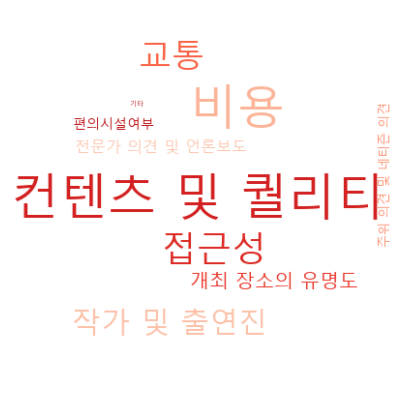

In [203]:
# standard_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(standard_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

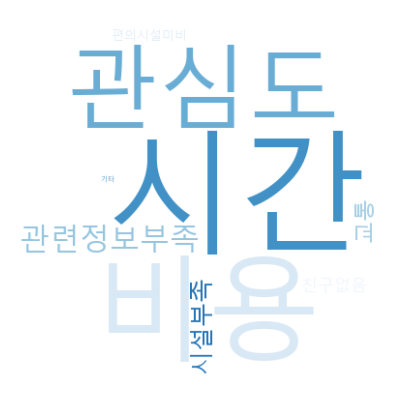

In [202]:
# block_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(block_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

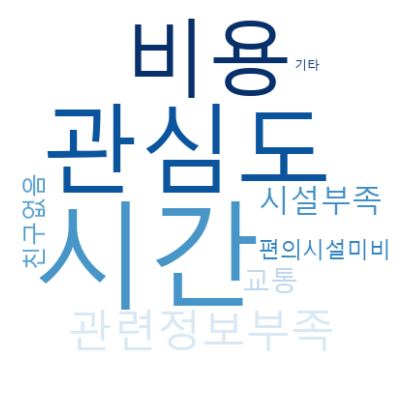

In [198]:
# difficulty_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(difficulty_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

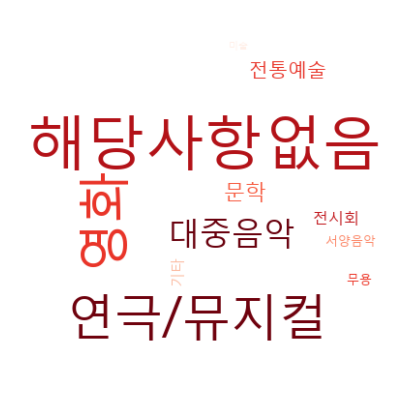

In [195]:
# expense_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')

<Figure size 500x500 with 0 Axes>

(-0.5, 400.5, 389.5, -0.5)

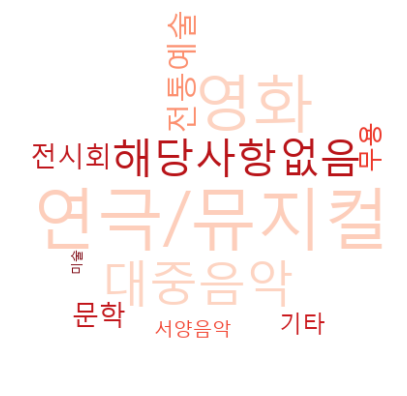

In [192]:
# expense_f_dict 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Reds', # 글씨색
    mask=cand_mask, # 워드클라우드 모양 설정
).generate_from_frequencies(expense_f_dict)

# 워드클라우드 출력
# 사이즈 설정
plt.figure(figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게

# 워드클라우드 이미지 저장
# plt.savefig('test.png')